In [1]:
import glob
import uproot
import numpy as np
#import h5py
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [2]:
XYZ =np.load("../NN_data/SBT_new_geo_XYZ.npy")

In [3]:
!ls ../

GNN_global.ipynb     recohists.root	  sbtveto
new_NN_data	     root.py		  ship.conical.Genie-TGeant4_rec.root
NN_data		     SBT		  testh5.ipynb
NN_dataloader.ipynb  SBT_new_geo_XYZ.npy


In [4]:
neu_files = glob.glob("../new_NN_data/root_files/*neuDIS*.root")
mu_files = glob.glob("../new_NN_data/root_files/*muDIS*.root")
#embg_files = glob.glob("../SBT/ml_dataset/*EMBG*.root")
embg_files = glob.glob("../new_NN_data/root_files/*EMBG*.root")

In [5]:
len(embg_files)

8099

In [6]:
len(neu_files)

75

In [7]:
len(mu_files)

391

In [8]:
to_concat = []
ys_concat = []
N=0
for i in range(0,10):
    file = uproot.open(neu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:854],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
            np.expand_dims(np.repeat(x[:,1708:1709],854,1),0),
            np.expand_dims(np.repeat(x[:,1709:1710],854,1),0),
            np.expand_dims(np.repeat(x[:,1710:1711],854,1),0),
            np.expand_dims(np.repeat(x[:,1711:1712],854,1),0),
            np.expand_dims(np.repeat(x[:,1714:1715],854,1),0),
            np.expand_dims(np.repeat(x[:,1715:1716],854,1),0),
            np.expand_dims(np.repeat(x[:,1716:1717],854,1),0) ])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(np.ones((N)))
print(N)
N=0
# for i in range(0,120):
#     file = uproot.open(mu_files[i])
#     x = file['tree;1']['inputmatrix'].array()
#     x = np.array(x)
#     N += x.shape[0]
#     new = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
#               np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
#               np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
#                     np.expand_dims(np.repeat(x[:,-5:-4],2000,1),0),
#                     np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
#                     np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
#                     np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0)])
#     new = np.swapaxes(new,0,1)
#     new = np.swapaxes(new,1,2)
#     to_concat.append(new)
# ys_concat.append(2*np.ones((N)))
# print(N)
for i in range(0,130):
    file = uproot.open(mu_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    if x.shape[0] < 1:
        continue
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:854],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
            np.expand_dims(np.repeat(x[:,1708:1709],854,1),0),
            np.expand_dims(np.repeat(x[:,1709:1710],854,1),0),
            np.expand_dims(np.repeat(x[:,1710:1711],854,1),0),
            np.expand_dims(np.repeat(x[:,1711:1712],854,1),0),
            np.expand_dims(np.repeat(x[:,1714:1715],854,1),0),
            np.expand_dims(np.repeat(x[:,1715:1716],854,1),0),
            np.expand_dims(np.repeat(x[:,1716:1717],854,1),0) ])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
ys_concat.append(2*np.ones((N)))
print(N)
N=0
for i in range(0,4):
    file = uproot.open(embg_files[i])
    x = file['tree;1']['inputmatrix'].array()
    x = np.array(x)
    N += x.shape[0]
    new = np.vstack([ np.expand_dims(x[:,:854],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
            np.expand_dims(np.repeat(x[:,1708:1709],854,1),0),
            np.expand_dims(np.repeat(x[:,1709:1710],854,1),0),
            np.expand_dims(np.repeat(x[:,1710:1711],854,1),0),
            np.expand_dims(np.repeat(x[:,1711:1712],854,1),0),
            np.expand_dims(np.repeat(x[:,1714:1715],854,1),0),
            np.expand_dims(np.repeat(x[:,1715:1716],854,1),0),
            np.expand_dims(np.repeat(x[:,1716:1717],854,1),0) ])
    new = np.swapaxes(new,0,1)
    new = np.swapaxes(new,1,2)
    to_concat.append(new)
print(N)
ys_concat.append(np.zeros((N)))

13102
16431
16562


In [9]:
X=np.concatenate(to_concat)

In [10]:
X[:,0,-1]

array([1.00433578e+02, 5.13463077e+01, 9.28846705e+02, ...,
       1.45336756e+00, 5.51535181e-01, 9.64959687e+00])

In [11]:
XSBT = X[:,:,:4].copy()

In [12]:
XSBT.shape

(46095, 854, 4)

In [13]:
XUBT = X[:,0,-7:-3].copy()

In [14]:
XUBT.shape

(46095, 4)

In [15]:
Xsig = X[:,0,-3:].copy()

In [16]:
Xsig.shape

(46095, 3)

In [17]:
Xsig.shape

(46095, 3)

In [18]:
ys=np.concatenate(ys_concat)

In [19]:
def adjacency(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A = np.zeros((n_dau+1, n_dau+1))
    
    A[0,:] =1
    A[:,0] =1
    A[0,0]= 0
    return A
    

In [20]:
def adjacency2(n_dau):
    """ generates a fully connected adjacency
        for a mother to daughters """
    #A = np.diag(np.ones(n_dau+1))
    A=np.ones((n_dau+1, n_dau+1)) #- np.diag( [1]*(n_dau+1) )
    return A

In [21]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [22]:
X_SBT_train, X_SBT_val , X_sig_train, X_sig_val, X_UBT_train, X_UBT_val,  y_train, y_val   = train_test_split(XSBT, Xsig, XUBT, ys , test_size= 0.2,shuffle=True)

In [23]:
del XSBT
del  Xsig, XUBT
del X

In [24]:
del ys

In [25]:
X_SBT_train.shape

(36876, 854, 4)

In [26]:
X_SBT_train[i].shape

(854, 4)

In [27]:
import torch
from torch_geometric.nn import knn
k=5
kmeans = True

In [28]:
X_UBT_train[0].shape

(4,)

In [29]:
train_data=[]
Xs = []
globals = []
edges = []
j = 0

for i in range(X_SBT_train.shape[0]):
    Xcon = X_SBT_train[i][ X_SBT_train[i][:,0]>0 ]
 
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 1:
        continue

    y = torch.tensor(y_train[i], dtype=torch.int64)
    #y = torch.tensor(y_train[i], dtype=torch.float)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2, Xcon2, k)
        assign_index = assign_index
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

 
    if edge_index.shape[1] == 0:
        print(edge_index.shape)

    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T

    global_features = np.hstack([X_UBT_train[i] , np.array([Xcon.shape[0]]) ])

    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)

    sig_vars = torch.tensor(X_sig_train[i], dtype=torch.float).unsqueeze(0)

    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)

    j += 1

    Xcon = torch.tensor(Xcon, dtype=torch.float)
    train_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos, sig_vars = sig_vars))

/tmp/ipykernel_11355/3637729449.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_11355/3637729449.py:10: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_11355/3637729449.py:37: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
/tmp/ipykernel_11355/3637729449.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_inde

In [30]:
val_data=[]

j = 0

for i in range(X_SBT_val.shape[0]):
    
    Xcon = X_SBT_val[i][ X_SBT_val[i][:,0]>0 ]
    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])

    if Xcon.shape[0] <1:
        continue



    y = torch.tensor(y_val[i], dtype=torch.int64)
    #y = torch.tensor(y_val[i], dtype=torch.float)

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2, Xcon2, k)
        assign_index = assign_index
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index


    
    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
  
    global_features = np.hstack([X_UBT_val[i] , np.array([Xcon.shape[0]]) ])
    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)
    sig_vars = torch.tensor(X_sig_train[i], dtype=torch.float).unsqueeze(0)
    j += 1
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    val_data.append(Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos, sig_vars = sig_vars))

/tmp/ipykernel_11355/3684555944.py:8: RuntimeWarning: divide by zero encountered in divide
  Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
/tmp/ipykernel_11355/3684555944.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
/tmp/ipykernel_11355/3684555944.py:36: RuntimeWarning: divide by zero encountered in divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
/tmp/ipykernel_11355/3684555944.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index

In [31]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

loader = DataLoader(train_data, batch_size=32 )#, shuffle=True)
valloader = DataLoader(val_data, batch_size=32 ) #shuffle=True)

In [32]:
STEP_SIZE = 2
MLP_OUTPUT_SIZE = 8
HIDDEN_CHANNELS = 64
NUM_LAYERS = 4
from sbtveto.model.gnn_model import EncodeProcessDecode
model=EncodeProcessDecode(mlp_output_size=MLP_OUTPUT_SIZE, global_op=3,num_blocks=4)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

EncodeProcessDecode(
  (_encoder): MLPGraphIndependent(
    (_network): GraphIndependent(
      (_edge_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_global_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
    )
  )
  (_core): MLPGraphNetwork(
    (_network): GraphNetwork(
      (_edge_block): EdgeBlock(
        (_edge_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_block): NodeBlock(
        (_node_model): MLP(-1, 128, 128, 128, 8)
        (_sent_edges_aggregator): EdgesToNodesAggregator()
      )
      (_global_block): GlobalBlock(
        (_global_model): MLP(-1, 128, 128, 128, 8)
        (_edges_aggregator): EdgesToGlobalsAggregator()
        (_nodes_aggregator): NodesToGlobalsAggregator()
      )
    )
  )
  (_blocks): ModuleList(
    (0-3): 4 x MLPGraphNetwork(
      (_network): GraphNetwork(
        (_ed

In [33]:
losses = []
accuracy = []
vallosses = []
valaccuracy = []
#BCE_criterion = torch.nn.BCEWithLogitsLoss()

In [34]:

optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.001)

criterion = torch.nn.CrossEntropyLoss()


for epoch in range(25):
    total = 0
    correct = 0
    valtotal = 0
    valcorrect = 0
    epoch_loss = 0 
    val_epoch_loss = 0
    if epoch == 20:
        optimizer_GCN = torch.optim.Adam(model.parameters(), lr=0.0001)
    
    for b in loader:
        b.to(device)


        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
  
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])

        optimizer_GCN.zero_grad()

        out = model(b)
        out = out['graph_globals']
        loss = criterion(out, b.y) 



        loss.backward()
        optimizer_GCN.step()
        total += b.y.size(0)
        epoch_loss += loss.item()/32

        
        
    for b in valloader:
        b.to(device)
        b['receivers'] = b.edge_index[1]
        b['senders'] = b.edge_index[0]
        b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
        
        out = model(b)['graph_globals']
        
        valloss = criterion(out, b.y)
       
        valtotal += b.y.size(0)
        val_epoch_loss += valloss.item()/32

        
            
        
    print("Epoch ", epoch)    
    print("Training Loss ", epoch_loss)

    print("Val Loss ", val_epoch_loss)

    losses.append(epoch_loss)

    vallosses.append(val_epoch_loss)
  
    print("")

Epoch  0
Training Loss  18.67443556431681
Val Loss  3.74264178192243

Epoch  1
Training Loss  15.355881623225287
Val Loss  3.470172032248229

Epoch  2
Training Loss  13.848227134440094
Val Loss  3.377972275018692

Epoch  3
Training Loss  12.859174149110913
Val Loss  3.001685617608018

Epoch  4
Training Loss  11.768216704484075
Val Loss  2.6990755738224834

Epoch  5
Training Loss  10.609305713907816
Val Loss  2.414453359786421

Epoch  6
Training Loss  9.948488358757459
Val Loss  2.563412582152523

Epoch  7
Training Loss  9.341677956515923
Val Loss  2.1456133446772583

Epoch  8
Training Loss  8.995230998261832
Val Loss  2.1142649500397965

Epoch  9
Training Loss  8.737206591293216
Val Loss  2.121081928315107

Epoch  10
Training Loss  8.210575719363987
Val Loss  2.4061351319542155

Epoch  11
Training Loss  8.090651107369922
Val Loss  2.180146205762867

Epoch  12
Training Loss  8.027945572277531
Val Loss  2.0110900897416286

Epoch  13
Training Loss  7.826782554446254
Val Loss  2.0132821068

In [44]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [45]:
#torch.save(model.state_dict(), "SBT_vacuum_multiclass_4block_GNN_newgeo.pt")

In [46]:
count_parameters(model)

682539

In [47]:
#model.load_state_dict(torch.load("data/SBT_vacuum_multiclass_4block_GNN_noUBT.pt", weights_only=True))
model.eval()

EncodeProcessDecode(
  (_encoder): MLPGraphIndependent(
    (_network): GraphIndependent(
      (_edge_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
      (_global_model): WrappedModelFnModule(
        (_model): MLP(-1, 128, 128, 128, 8)
      )
    )
  )
  (_core): MLPGraphNetwork(
    (_network): GraphNetwork(
      (_edge_block): EdgeBlock(
        (_edge_model): MLP(-1, 128, 128, 128, 8)
      )
      (_node_block): NodeBlock(
        (_node_model): MLP(-1, 128, 128, 128, 8)
        (_sent_edges_aggregator): EdgesToNodesAggregator()
      )
      (_global_block): GlobalBlock(
        (_global_model): MLP(-1, 128, 128, 128, 8)
        (_edges_aggregator): EdgesToGlobalsAggregator()
        (_nodes_aggregator): NodesToGlobalsAggregator()
      )
    )
  )
  (_blocks): ModuleList(
    (0-3): 4 x MLPGraphNetwork(
      (_network): GraphNetwork(
        (_ed

In [48]:
from torch import nn
sig = nn.Sigmoid()

In [49]:
b

DataBatch(edge_index=[2, 7710], y=[7], nodes=[412, 8], edges=[7710, 8], graph_globals=[7, 8], edgepos=[7710], sig_vars=[7, 3], batch=[412], ptr=[8], receivers=[7710], senders=[7710])

In [50]:
ypreds  = []
true = []
for b in valloader:
    b.to(device)
    #b['graph_globals'] = b['graph_globals'].unsqueeze(1)
    #b['edges'] = b['edges'].unsqueeze(1)
    b['receivers'] = b.edge_index[1]
    b['senders'] = b.edge_index[0]
    b['edgepos'] = b['edgepos'] - torch.min(b['edgepos'])
    out = model(b)["graph_globals"]
    out = out.squeeze(1)

    _, predicted = torch.max(out, dim = 1)
    true.append(b.y.detach().cpu().numpy())
    ypreds.append(predicted.cpu().detach().numpy())        
preds = np.concatenate(ypreds)
true = np.concatenate(true)

In [51]:
np.sum(preds == true)/true.shape[0]

np.float64(0.9437715301700189)

In [52]:
labels=['signal',r'$\nu$-DIS', r'$\mu$-DIS']
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, preds)

In [53]:
cmnew =cm/np.expand_dims(np.sum(cm,1),1)

In [54]:
def plot_errorband(x, y, y_err, label, color):
    plt.plot(x, y, color=color, ls='solid', label=label)
    plt.fill_between(x, y_err[0],y_err[1], color=color, alpha=0.3, lw=0)
   
    
def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)
class Tango(object):
    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'

init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

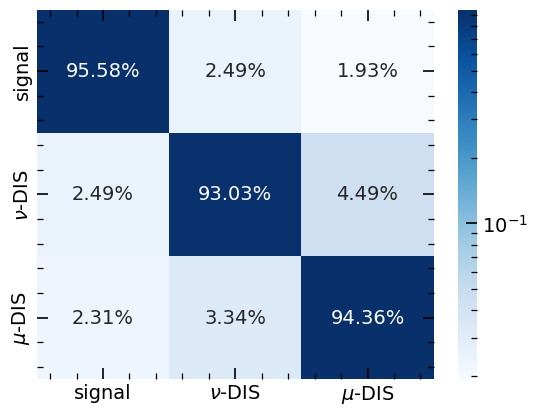

In [55]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('GNN_SHIP_Dec_Confusion.png')

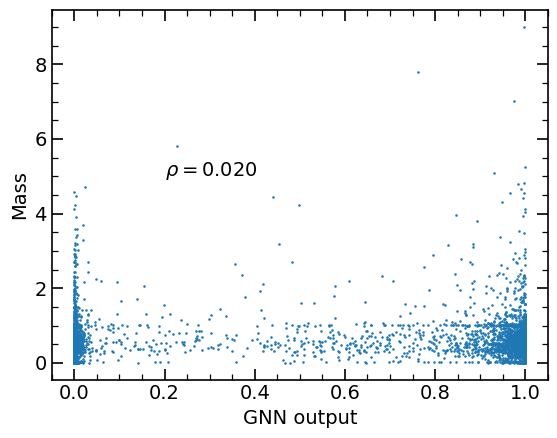

In [69]:
corr = np.corrcoef(x=preds.flatten(),y=sig_vars[:,0].flatten())

plt.scatter(preds,sig_vars[:,0],s=0.7)
plt.text(0.2,5, r'$\rho=${0:.3f}'.format(corr[0][1]))
plt.ylabel("Mass")

plt.xlabel("GNN output")
plt.savefig("Mass_vs_SBT_GNN.png")

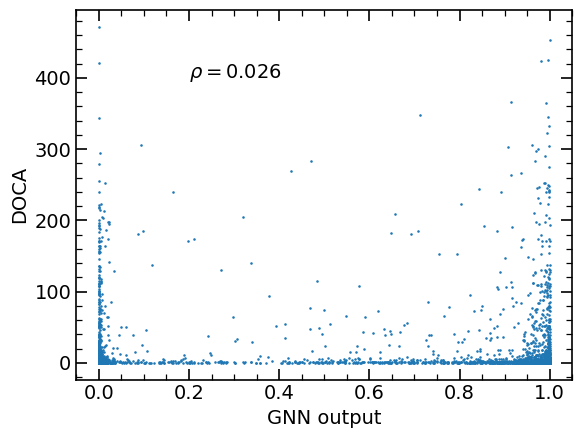

In [70]:
corr = np.corrcoef(x=preds.flatten(),y=sig_vars[:,1].flatten())

plt.scatter(preds,sig_vars[:,1],s=0.7)
plt.text(0.2,400, r'$\rho=${0:.3f}'.format(corr[0][1]))
plt.ylabel("DOCA")

plt.xlabel("GNN output")
plt.savefig("DOCA_vs_SBT_GNN.png")

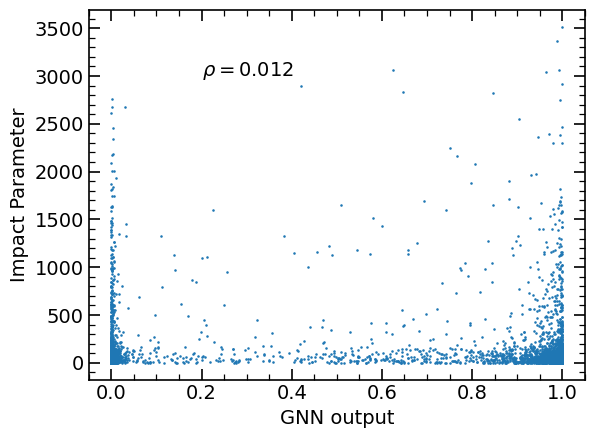

In [71]:
corr = np.corrcoef(x=preds.flatten(),y=sig_vars[:,2].flatten())

plt.scatter(preds,sig_vars[:,2],s=0.7)
plt.text(0.2,3000, r'$\rho=${0:.3f}'.format(corr[0][1]))
plt.ylabel("Impact Parameter")

plt.xlabel("GNN output")
plt.savefig("IP_vs_SBT_GNN.png")

In [115]:
preds.shape

(3929,)

In [56]:
np.sum(ypreds == true)/true.shape[0]

np.float64(0.9460422499363705)

In [57]:
preds

array([9.9940193e-01, 9.9246734e-01, 9.9715495e-01, ..., 1.1928423e-04,
       1.7095507e-04, 5.8945653e-04], dtype=float32)

In [58]:
true[true==0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [59]:
labels=['signal',r'$\nu$-DIS']
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, ypreds)

In [60]:
cmnew =cm/np.expand_dims(np.sum(cm,1),1)

In [61]:
np.expand_dims(np.sum(cm,1),1)

array([[1838],
       [2091]])

In [62]:
cm

array([[1678,  160],
       [  52, 2039]])

In [63]:
100*9/(9+3+3050)

0.29392553886348793

In [64]:
1181/(1181+3)

0.9974662162162162

In [65]:
cmnew

array([[0.91294886, 0.08705114],
       [0.02486848, 0.97513152]])

In [66]:
import matplotlib.pyplot as plt

def plot_errorband(x, y, y_err, label, color):
    plt.plot(x, y, color=color, ls='solid', label=label)
    plt.fill_between(x, y_err[0],y_err[1], color=color, alpha=0.3, lw=0)
   
    
def init_thesis_plot_style():
    my_rc_params = {
        "xtick.direction": "in",
        "xtick.major.size": 8.0,
        "xtick.minor.size": 4.0,
        "xtick.minor.visible": True,
        "xtick.major.width": 1.2,
        "xtick.minor.width": 0.9,
        "ytick.direction": "in",
        "ytick.major.size": 8.0,
        "ytick.minor.size": 4.0,
        "ytick.minor.visible": True,
        "ytick.major.width": 1.2,
        "ytick.minor.width": 0.9,
        "errorbar.capsize": 2,
        "axes.linewidth": 1.2,
        # "font.familiy": "serif",
        "font.size": 14,
        "axes.grid": False,
        "ytick.right": True,
        "xtick.top": True
    }
    return(my_rc_params)
class Tango(object):
    scarlet_red_light = '#ef2929'
    scarlet_red = '#cc0000'
    scarlet_red_dark = '#a40000'

    aluminium_light = '#eeeeec'
    aluminium = '#d3d7cf'
    aluminium_dark = '#babdb6'

    butter_light = '#fce94f'
    butter = '#edd400'
    butter_dark = '#c4a000'

    chameleon_light = '#8ae234'
    chameleon = '#73d216'
    chameleon_dark = '#4e9a06'

    orange_light = '#fcaf3e'
    orange = '#f57900'
    orange_dark = '#ce5c00'

    chocolate_light = '#e9b96e'
    chocolate = '#c17d11'
    chocolate_dark = '#8f5902'

    sky_blue_light = '#729fcf'
    sky_blue = '#3465a4'
    sky_blue_dark = '#204a87'

    plum_light = '#ad7fa8'
    plum = '#75507b'
    plum_dark = '#5c3566'

    slate_light = '#888a85'
    slate = '#555753'
    slate_dark = '#2e3436'

init_thesis_plot_style()
plt.rcParams.update(init_thesis_plot_style())

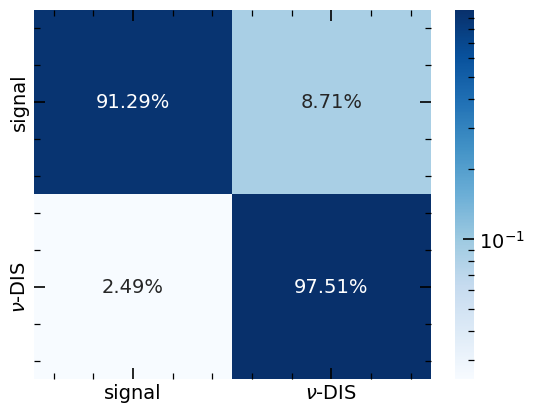

In [67]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('GNN_SHIP_Dec_Confusion_binary.png')

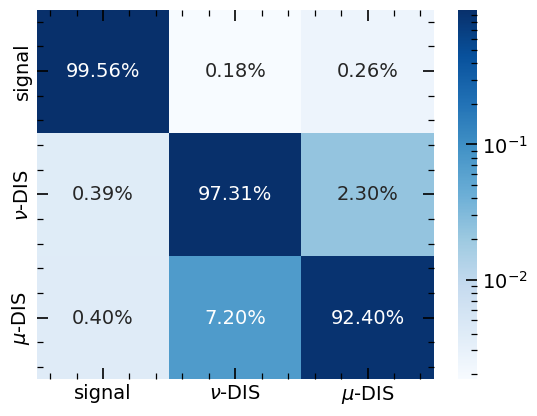

In [67]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.heatmap(cmnew, 
            fmt='.2%', norm= LogNorm(),
            annot=True,  xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.savefig('CM_GNN_CE_val_newdataset_new.png')

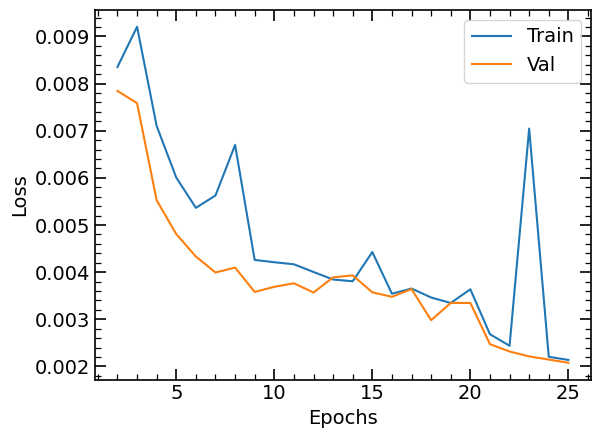

In [87]:
import matplotlib.pyplot as plt
epochs = np.arange(1, len(losses)+1)

plt.plot(epochs[1:],np.array(losses)[1:]*32./len(train_data), label="Train")
plt.plot(epochs[1:],np.array(vallosses)[1:]*32./len(val_data), label="Val")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [65]:
file = uproot.open(neu_files[0])
x = file['tree;1']['inputmatrix'].array()
x = np.array(x)[:,:-1]

In [63]:
def gnn_output(model, x, XYZ,  device = "cpu"):
    j=0
    X = np.vstack([ np.expand_dims(x[:,:2000],0),np.expand_dims(np.repeat(XYZ[:1,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[1:2,:],x.shape[0],0),0),
              np.expand_dims(np.repeat(XYZ[2:,:],x.shape[0],0),0),
                    np.expand_dims(np.repeat(x[:,-4:-3],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-3:-2],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-2:-1],2000,1),0),
                    np.expand_dims(np.repeat(x[:,-1:],2000,1),0)])
    X = np.swapaxes(X,0,1)
    X = np.swapaxes(X,1,2)
    XSBT = X[:,:,:4].copy()
   
    X_UBT_sigvertex = X[:,0,-4:].copy()[0]   
    Xcon = XSBT[0][ XSBT[0][:,0]>0 ]
    print(X_UBT_sigvertex.shape)
    print(Xcon.shape)

    Xcon = np.hstack([Xcon , np.expand_dims(np.arctan(Xcon[:,2] / Xcon[:,1]),1)])
    if Xcon.shape[0] < 2:
        print("dimension not large enough ")
        # in this case will need to use nn
        return False

    Xcon2 = torch.tensor(Xcon, dtype=torch.float)
    if Xcon.shape[0] < 22:
        A = adjacency2(Xcon.shape[0]-1)
        edge_index =torch.tensor(A, dtype=torch.float).nonzero().t().contiguous() 
    else:
        k = 20
        assign_index = knn(Xcon2, Xcon2, k)
        assign_index = assign_index+1
        assign_index = assign_index[:,assign_index[0]!=assign_index[1]]
        edge_index = assign_index

    if edge_index.shape[1] == 0:
        print(edge_index.shape)

    if Xcon.shape[0] == 1:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,0)), dtype=torch.float)
    else:
        r = torch.tensor(np.sqrt(np.sum((Xcon[edge_index[0],1:4] - Xcon[edge_index[1],1:4])**2,1)), dtype=torch.float)
    delta_z =torch.tensor(torch.tensor( Xcon[edge_index[0],3] - Xcon[edge_index[1],3]), dtype=torch.float)
    delta_phi =torch.tensor( np.arctan(Xcon[edge_index[0],2] / Xcon[edge_index[0],1]) - np.arctan(Xcon[edge_index[1],2] / Xcon[edge_index[1],1]), dtype=torch.float)
    edge_features = torch.vstack([r, delta_z, delta_phi])
    edge_features = edge_features.T
    global_features = np.hstack([X_UBT_sigvertex , np.array([Xcon.shape[0]]) ])
    global_features = torch.tensor(global_features, dtype=torch.float).unsqueeze(0)
    edgepos =  torch.tensor([j]*edge_index[0].shape[0],dtype=torch.int64)
    Xcon = torch.tensor(Xcon, dtype=torch.float)
    graph = Data(nodes=Xcon, edge_index=edge_index,y = y, edges = edge_features, graph_globals = global_features, edgepos=edgepos)
    graph
    graph['receivers'] = graph.edge_index[1]
    graph['senders'] = graph.edge_index[0]
    graph['edgepos'] = graph['edgepos'] - torch.min(graph['edgepos'])
    graph.batch = torch.zeros(graph.nodes.shape[0],dtype= torch.int64)
    graph.to(device)
    output_graph = model(graph)
    return(output_graph)